In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

df1 = pd.read_csv('/content/drive/MyDrive/United Airlines/Datasets/Inflight Service_Inventory data.csv')
df2 = pd.read_csv('/content/drive/MyDrive/United Airlines/Datasets/Inflight Service_Pre order data.csv')
df4 = pd.read_csv('/content/drive/MyDrive/United Airlines/Datasets/Survey data_Inflight Satisfaction Score.csv')

# dropping unwanted columns
columns_to_drop2 = ['carrier_code', 'departure_station_code', 'arrival_station_code']
df2.drop(columns=columns_to_drop2, inplace=True)
columns_to_drop4 = ['driver_sub_group1', 'driver_sub_group2', 'ua_uax', 'departure_gate', 'arrival_gate', 'equipment_type_code']
df4.drop(columns=columns_to_drop4, inplace=True)

# Renaming Column Names
df1.rename(columns={'departure_station_code': 'origin_station_code', 'arrival_station_code': 'destination_station_code', 'scheduled_departure_dtl': 'scheduled_departure_date'}, inplace=True)
df2.rename(columns={'departure_station_code': 'origin_station_code', 'arrival_station_code': 'destination_station_code', 'scheduled_departure_dtl': 'scheduled_departure_date'}, inplace=True)

# Converting data types
df4['score'] = pd.to_numeric(df4['score'], errors='coerce')
df1['scheduled_departure_date'] = pd.to_datetime(df1['scheduled_departure_date'])
df4['scheduled_departure_date'] = pd.to_datetime(df4['scheduled_departure_date'])

#Cleaning
df4 = df4[df4['score'].notnull()]

In [2]:
# Merging
merged_data = pd.merge(df1, df4, on=['flight_number', 'origin_station_code', 'destination_station_code', 'scheduled_departure_date'])

# Selecting relevant columns
selected_columns = ['score', 'planned_entree_count', 'consumed_entree_count', 'haul_type', 'international_domestic_indicator']

data_for_analysis = merged_data[selected_columns]
data_for_analysis

,score,planned_entree_count,consumed_entree_count,haul_type,international_domestic_indicator
0,2.0,9,7,Medium,Domestic
1,2.0,5,5,Medium,Domestic
2,2.0,2,0,Medium,Domestic
3,1.0,1,0,Medium,Domestic
4,1.0,1,1,Medium,Domestic
...,...,...,...,...,...
25116,2.0,12,9,Medium,Domestic
25117,3.0,12,0,Medium,Domestic
25118,3.0,8,0,Medium,Domestic
25119,3.0,12,9,Medium,Domestic


<ipython-input-3-676e63f453c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_analysis.fillna(0, inplace=True)


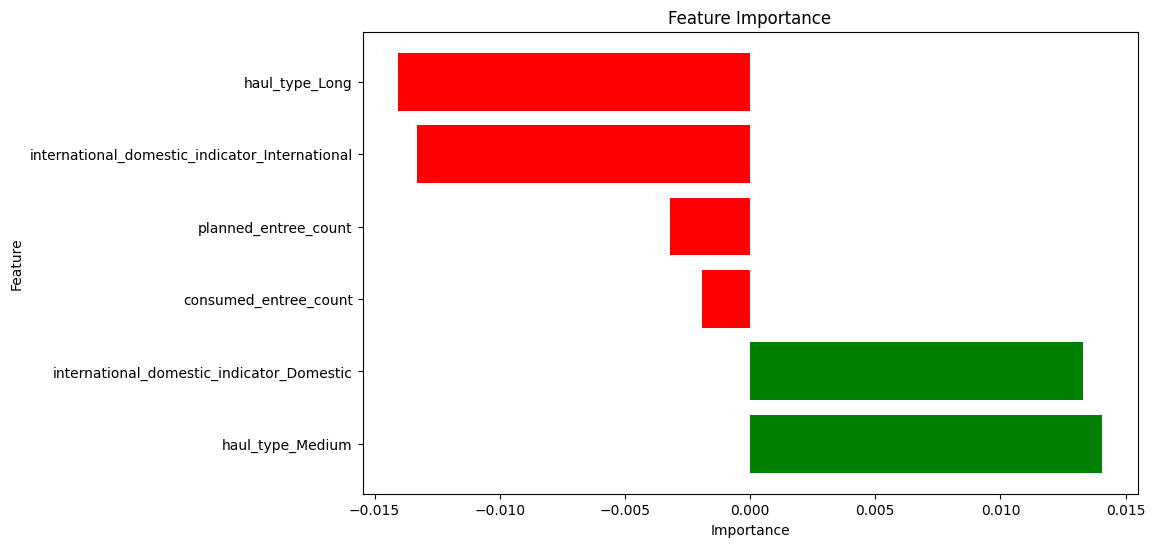

In [3]:
# Handle missing values
data_for_analysis.fillna(0, inplace=True)

# One Hot encoding
data_for_analysis = pd.get_dummies(data_for_analysis, columns=['haul_type', 'international_domestic_indicator'])

X = data_for_analysis.drop('score', axis=1)
y = data_for_analysis['score']

# Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients (importance) of each feature
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_})

# Sorting features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

pd.DataFrame(feature_importance)

plt.figure(figsize=(10, 6))
bar_colors = ['red' if val < 0 else 'green' for val in feature_importance['Importance']]
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color=bar_colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

0


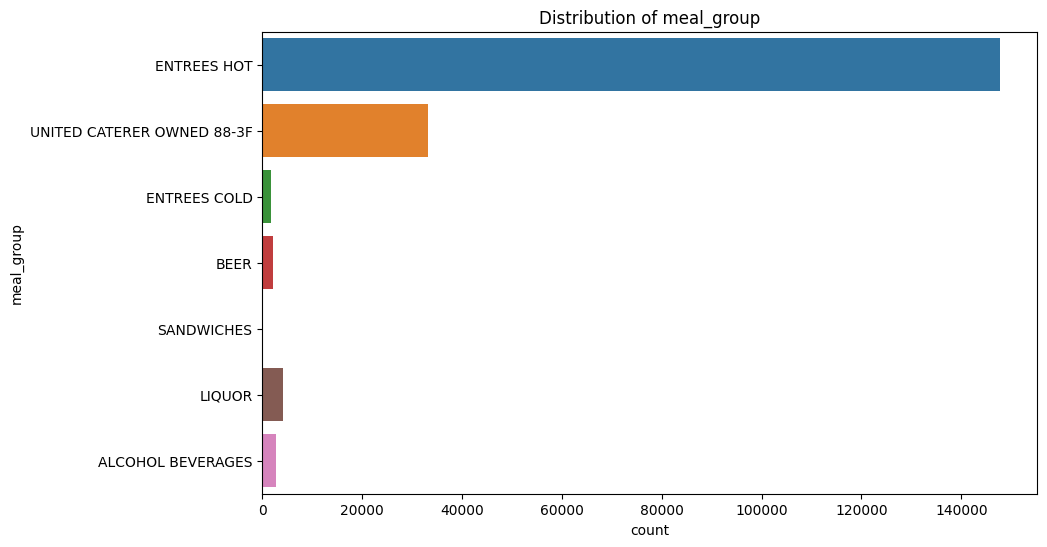

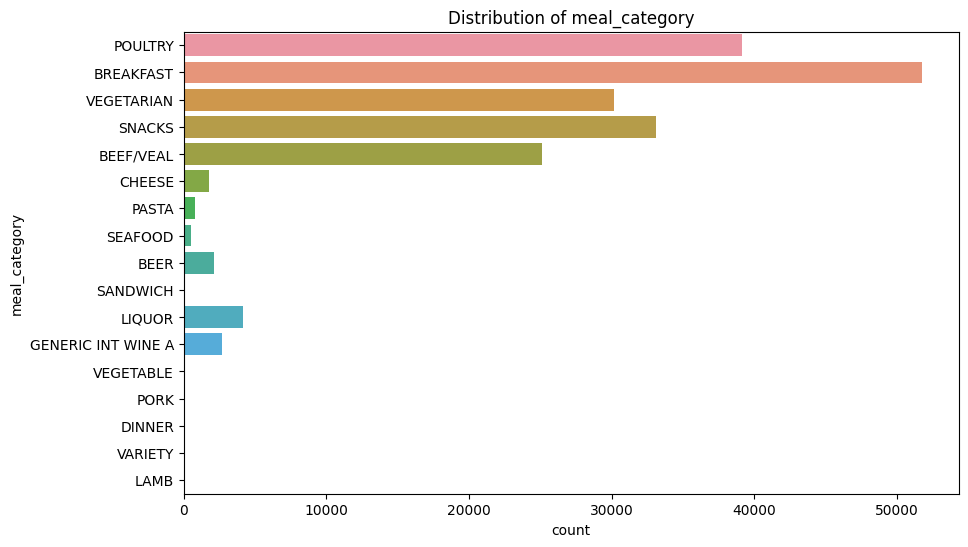

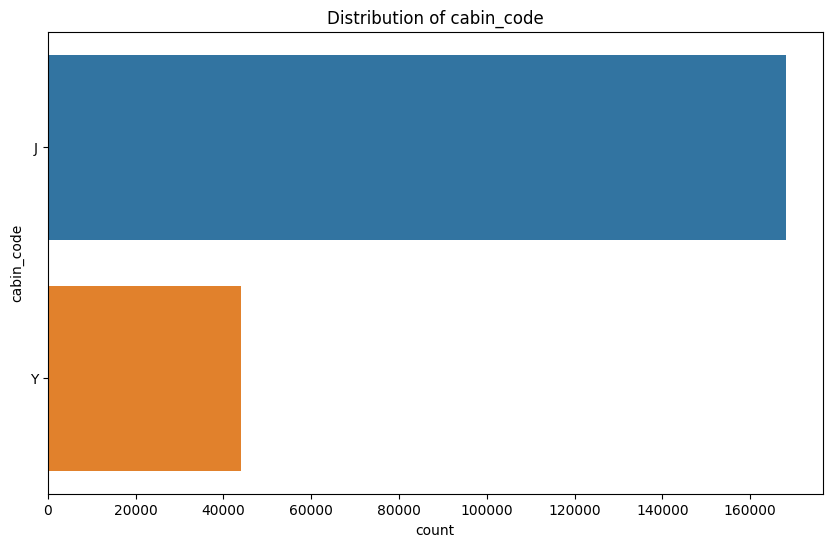

In [4]:
#Visualisations for pre order data

print(df2.duplicated().sum())
df2.drop_duplicates(inplace=True)

# Categorical Variables Analysis
categorical_columns = ['meal_group', 'meal_category', 'cabin_code']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df2, y=column)
    plt.title(f'Distribution of {column}')
    plt.show()